<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/colab/logistic_regression_and_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression and k-NN

## 1. 필요한 라이브러리 가져오기
- pandas
- numpy
- scikit-learn
- matplotlib

In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## 2. 사용자 입력 함수 정의
- 사용할 알고리즘 선택
- 훈련 데이터를 읽을 파일 선택
- 검증 데이터를 읽을 파일 선택

In [2]:
def get_user_input() -> (int, str, str):
  print("""
Which learning algorithm do you want to use?
  1. Logistic Regression
  2. k-NN""")
  algorithm:int = int(input("Enter the number: "))# 1, 2
  if algorithm not in range(1, 3):
    print("Please check your input again. Algorithm selection must be 1 or 2", file=sys.stderr)
    return
  train_file:str = input("Enter the file name of training data: ") # data100.txt
  test_file:str = input("Enter the file name of test data: ") # data100.txt
  return (algorithm, train_file, test_file)

## 3. Logistic Regression
- 훈련 데이터와 검증 데이터를 입력과 레이블로 분리
- 데이터 정규화(standardization, 표준 정규 분포로 변환) -> 아웃라이너에 대해 강인하게 한다.
- model 학습
- parameter, confusion matrix 출력

In [3]:
def logistic_regression(train_df: pd.DataFrame, test_df: pd.DataFrame)->float:
  train_input = train_df[['x', 'y', 'z']]
  train_label = train_df['class']
  test_input = test_df[['x', 'y', 'z']]
  test_label = test_df['class']

  s_scaler = StandardScaler()
  train_input = s_scaler.fit_transform(train_input, train_label)
  test_input = s_scaler.transform(test_input)

  model = LogisticRegression(penalty='l1', solver='liblinear')
  model.fit(train_input, train_label)
  b = model.intercept_[0]
  w1, w2, w3 = model.coef_[0]
  print(f"Parameters: ({b:.6f}, {w1:.6f}, {w2:.6f}, {w3:.6f})")
  #sqr = w1 + w2 + w3 + b
  #print(1/(1 + np.power(np.e, -sqr)))
  #print(model.predict_proba([[1, 1, 1]]))
  tn, fp, fn, tp = confusion_matrix(test_label, model.predict(test_input)).ravel()
  print(f"""
TP: {tp}, FN: {fn}
FP: {fp}, TN: {tn}
  """.strip())
  score = model.score(test_input, test_label)
  print("Score:", score)
  return score

## 4. k-NN
- 훈련 데이터와 검증 데이터를 입력과 레이블로 분리
- k 입력
- model 학습
- confusion matrix 출력

In [30]:
def k_nn_classification(train_df: pd.DataFrame, test_df: pd.DataFrame, k = 0, is_print = True)->float:
  train_input = train_df[['x', 'y', 'z']]
  train_label = train_df['class']
  test_input = test_df[['x', 'y', 'z']]
  test_label = test_df['class']
  if k == 0:
    k = int(input("Enter the value for k: "))
  model = KNeighborsClassifier(n_neighbors=k)#, weights='distance')
  model.fit(train_input, train_label)
  score = model.score(test_input, test_label) # (tp + tn)/100
  if is_print:
    tn, fp, fn, tp = confusion_matrix(test_label, model.predict(test_input)).ravel()
    print(f"""
TP: {tp}, FN: {fn}
FP: {fp}, TN: {tn}
    """.strip())
    print("Score:", score)
  return score 

## 5. main 함수 정의
- 문제에서 제시된 것과 같이 작동

In [5]:
def __main__():
  (algorithm, train_file, test_file) = get_user_input()
  try:
    train_df = pd.read_csv(train_file, names=['x', 'y', 'z', 'class'])
    test_df = pd.read_csv(test_file, names=['x', 'y', 'z', 'class'])
  except FileNotFoundError:
    print("Please check your file name again. No such file or directory.", file=sys.stderr)
  else:
    if algorithm == 1: # Logistic Regression
      logistic_regression(train_df, test_df)
    else: # k-NN
      k_nn_classification(train_df, test_df)

if __name__ == "__main__":
  __main__()


Which learning algorithm do you want to use?
  1. Logistic Regression
  2. k-NN
Enter the number: 1
Enter the file name of training data: 3d100a.txt
Enter the file name of test data: 3d100a.txt
Parameters: (-0.224775, 2.438151, -1.652811, 4.233974)
TP: 43, FN: 5
FP: 6, TN: 46
Score: 0.89


## 6. 평가
- main 함수를 이용하여 알고리즘을 선택하고 파일 이름을 입력할 수 있지만 평가의 편의상 새로운 함수를 정의하여 빠르게 학습 결과를 확인할 수 있도록 한다.

In [13]:
def test(algorithm, train_file, test_file, k = 0, k_print=False):
  try:
    train_df = pd.read_csv(train_file, names=['x', 'y', 'z', 'class'])
    test_df = pd.read_csv(test_file, names=['x', 'y', 'z', 'class'])
  except FileNotFoundError:
    print("Please check your file name again. No such file or directory.", file=sys.stderr)
  else:
    if algorithm == 1: # Logistic Regression
      result = logistic_regression(train_df, test_df)
    else: # k-NN
      result = k_nn_classification(train_df, test_df, k=k, is_print=k_print)
  return result

### Logistic Regression
- Train by 3d100a and test by 3d100a
- Train by 3d100a and test by 3d100b
- Train by 3d100b and test by 3d100b
- Train by 3d100b and test by 3d100a
  
logistic regression이 꽤 높은 적중률을 보인다.  
a파일에 대해 a파일은 89%, b파일은 83%, b파일에 대해 a파일은 89%, b파일은 91% 확률로 결과를 바르게 예측하였다.   
추가적으로 3d1000.txt로 학습시킬 경우, a파일에서 100개 중 89개, b파일에서 100개 중 90개를 맞추었다.  
같은 경우에서 k-NN은 각각 89개, 84개를 적중하였다.

In [34]:
for (train_file, test_file) in [["3d100a.txt", "3d100a.txt"], ["3d100a.txt", "3d100b.txt"], ["3d100b.txt", "3d100a.txt"], ["3d100b.txt", "3d100b.txt"]]:
#, ["3d1000.txt", "3d100a.txt"], ["3d1000.txt", "3d100b.txt"]
  print(f"Train file: {train_file},\tTest file: {test_file}")
  test(1, train_file, test_file)
  print()

Train file: 3d100a.txt,	Test file: 3d100a.txt
Parameters: (-0.224762, 2.438037, -1.652731, 4.233806)
TP: 43, FN: 5
FP: 6, TN: 46
Score: 0.89

Train file: 3d100a.txt,	Test file: 3d100b.txt
Parameters: (-0.224776, 2.438154, -1.652813, 4.234108)
TP: 43, FN: 7
FP: 10, TN: 40
Score: 0.83

Train file: 3d100b.txt,	Test file: 3d100a.txt
Parameters: (0.000000, 5.179468, -2.182953, 6.651482)
TP: 44, FN: 4
FP: 7, TN: 45
Score: 0.89

Train file: 3d100b.txt,	Test file: 3d100b.txt
Parameters: (0.000000, 5.179211, -2.182848, 6.651165)
TP: 46, FN: 4
FP: 5, TN: 45
Score: 0.91



### k-NN
- Train by 3d100a and test by 3d100b
- Train by 3d100b and test by 3d100a
- Train by 3d1000 and test by 3d100a
- Train by 3d1000 and test by 3d100b

최상의 결과를 나타내는 k 값을 찾기 위해 k를 1부터 50까지 바꾸어가며 확인해보았다.  
적은 학습 데이터를 이용하였을 때는 a파일과 b파일에 대해 70%, 81%로 로지스틱 회귀를 이용하였을 때보다도 낮은 적중률을 보였다.  
학습 데이터를 대폭 늘렸을 때는 a파일과 b파일에 대해 89%, 84%로 적중률이 향상되는 것을 확인할 수 있다.

Train file: 3d100a.txt,	Test file: 3d100b.txt


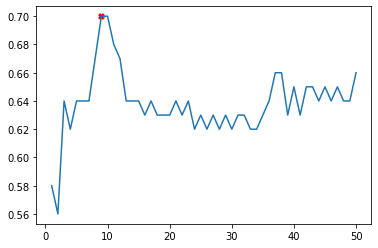

Best k = 9
TP: 36, FN: 14
FP: 16, TN: 34
Score: 0.7


Train file: 3d100b.txt,	Test file: 3d100a.txt


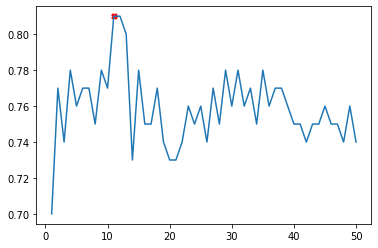

Best k = 11
TP: 39, FN: 9
FP: 10, TN: 42
Score: 0.81


Train file: 3d1000.txt,	Test file: 3d100a.txt


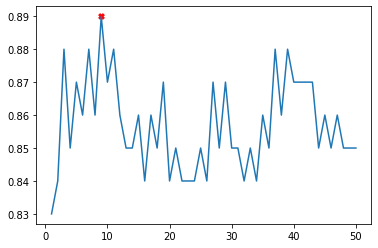

Best k = 9
TP: 42, FN: 6
FP: 5, TN: 47
Score: 0.89


Train file: 3d1000.txt,	Test file: 3d100b.txt


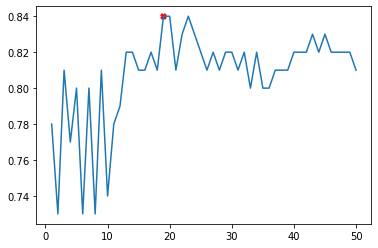

Best k = 19
TP: 36, FN: 14
FP: 2, TN: 48
Score: 0.84




In [37]:
ran = range(1, 51)
for (train_file, test_file) in [["3d100a.txt", "3d100b.txt"], ["3d100b.txt", "3d100a.txt"], ["3d1000.txt", "3d100a.txt"], ["3d1000.txt", "3d100b.txt"]]:
  print(f"Train file: {train_file},\tTest file: {test_file}")
  result = [(test(2, train_file, test_file, i)) for i in ran]
  best_score = max(result)
  best_k = result.index(best_score) + 1
  plt.plot(ran, result)
  plt.scatter(best_k, best_score, marker='X', s=30, c='red')
  plt.show()
  print("Best k =", best_k)
  test(2, train_file, test_file, best_k, True)
  print("\n")